# Webinar 2: EOPF Sample Service - Hands-on with Xarray 

In [1]:
import os
import fsspec
import s3fs
import xarray as xr
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Accessing one single file with Xarray and Zarr

In [2]:
prefix = "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253"

coder = xr.coders.CFTimedeltaCoder(time_unit="s")
remote_product_path = prefix + "/" + os.path.basename("S2A_MSIL2A_20180601T102021_N0500_R065_T32UPC_20230902T045008.zarr")
print("File to open: ", remote_product_path)

dset = xr.open_datatree(remote_product_path, engine="zarr", chunks={} , decode_timedelta=coder)
dset

File to open:  https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180601T102021_N0500_R065_T32UPC_20230902T045008.zarr


/srv/conda/envs/eopf-xarray/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


<xarray.DataTree>
Group: /
│   Attributes:
│       other_metadata:  {'AOT_retrieval_model': 'CAMS', 'L0_ancillary_data_quali...
│       stac_discovery:  {'assets': {'analytic': {'eo:bands': [{'center_wavelengt...
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, y: 23, x: 23,
│   │                                           detector: 7)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b01' 'b02' ... 'b11' 'b12'
│   │         * detector                       (detector) int64 56B 2 3 4 5 6 7 8
│   │         * x                              (x) int64 184B 600000 605000 ... 710000
│   │         * y                              (y) int64 184B 5800020 5795020 ... 5690020
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
│   │           sun_angles                     (angle, y, x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
│   │   │   │         * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b03      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b04      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b08      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 44kB 600010 600030 600050 600070 ... 709750 709770 709790
│   │   │   │         * y        (y) int64 44kB 5800010 5799990 5799970 ... 5690270 5690250 5690230
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b06      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b07      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b11      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b12      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b8a      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) int64 15kB 600030 600090 600150 600210 ... 709650 709710 709770
│   │   │             * y        (y) int64 15kB 5799990 5799930 5799870 ... 5690370 5690310 5690250
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   │               b09      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   │               b10      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   ├── Group: /conditi

## Understanding data organisation

Browse the different groups. The data and variables you may need can be saved in different groups. Once you have a good understanding of the data organisation, you can use Xarray to directly access the groups and variables you need.

To compute NDVI, we would like:
-  Access data from the group **"/measurements/reflectance/r10m"** because this is where we can find the different measurements from the different available channels.
- Access data from the group **"/conditions/mask/l2a_classification/r20m"** because this is where can find **scl** variable (Scene Classification Layer)


The SCL band classifies each pixel into one of several categories, such as:
- 0 – No data
- 1 – Clear-sky land
- 2 – Clear-sky water
- 3 – Cloud
- 4 – Cloud shadow
- 5 – Snow/ice
- 6 – Vegetation
- 7 – Bare soil
- 8 – Urban
- 9 – Water bodies
- 10 – Saturated and barren areas

In [3]:
dset["/measurements/reflectance/r10m"]

<xarray.DataTree 'r10m'>
Group: /measurements/reflectance/r10m
    Dimensions:  (y: 10980, x: 10980)
    Coordinates:
      * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
      * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
    Data variables:
        b02      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
        b03      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
        b04      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
        b08      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>

In [4]:
dset["/conditions/mask/l2a_classification/r20m"]

<xarray.DataTree 'r20m'>
Group: /conditions/mask/l2a_classification/r20m
    Dimensions:  (y: 5490, x: 5490)
    Coordinates:
      * x        (x) int64 44kB 600010 600030 600050 600070 ... 709750 709770 709790
      * y        (y) int64 44kB 5800010 5799990 5799970 ... 5690270 5690250 5690230
    Data variables:
        scl      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>

## Accessing several tiles with Xarray

In [5]:
bucket = "e05ab01a9d56408d82ac32d69a5aae2a:sample-data"
prefix = "tutorial_data/cpm_v253/"

# Create the S3FileSystem with a custom endpoint
fs = s3fs.S3FileSystem(
    anon=True,
    client_kwargs={
        "endpoint_url": "https://objectstore.eodc.eu:2222"
    }
)

# unregister handler to make boto3 work with CEPH
handlers = fs.s3.meta.events._emitter._handlers
handlers_to_unregister = handlers.prefix_search("before-parameter-build.s3")
handler_to_unregister = handlers_to_unregister[0]
fs.s3.meta.events._emitter.unregister(
    "before-parameter-build.s3", handler_to_unregister
)

s3path = "s3://" + f"{bucket}/{prefix}" + "S2A_MSIL2A*.zarr"
remote_files = fs.glob(s3path)
remote_files[0:5]

['e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180601T102021_N0500_R065_T32UPC_20230902T045008.zarr',
 'e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180604T103021_N0500_R108_T32UPC_20230819T205634.zarr',
 'e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180611T102021_N0500_R065_T32UPC_20230714T225353.zarr',
 'e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180614T103021_N0500_R108_T32UPC_20230813T122609.zarr',
 'e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2A_MSIL2A_20180621T102021_N0500_R065_T32UPC_20230827T073006.zarr']

## Extract time from filenames

Each tile has a specific date and time which we want to capture when concatenating all the tiles together for further data processing

In [6]:
date_format = "%Y%m%dT%H%M%S"
time_coords = [datetime.strptime(os.path.basename(f).split("_")[2], date_format) 
               for f in remote_files]
time_coords[0:5]

[datetime.datetime(2018, 6, 1, 10, 20, 21),
 datetime.datetime(2018, 6, 4, 10, 30, 21),
 datetime.datetime(2018, 6, 11, 10, 20, 21),
 datetime.datetime(2018, 6, 14, 10, 30, 21),
 datetime.datetime(2018, 6, 21, 10, 20, 21)]

## Open several tiles with Xarray and concatenate along the time dimension

In [7]:
nb_files_to_process = 15

prefix = "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253"

coder = xr.coders.CFTimedeltaCoder(time_unit="s")
datasets_r10m = [xr.open_dataset( prefix + "/" + os.path.basename(f), engine="zarr", 
                            group="/measurements/reflectance/r10m", 
                            chunks={} , 
                            decode_timedelta=coder) for f in remote_files[0:nb_files_to_process]]

datasets_scl_r20m = [xr.open_dataset( prefix + "/" + os.path.basename(f), engine="zarr", 
                            group="/conditions/mask/l2a_classification/r20m", 
                            chunks={} , 
                            decode_timedelta=coder) for f in remote_files[0:nb_files_to_process]]

In [8]:
ds_r10m = xr.concat(datasets_r10m, dim="time", coords="minimal").assign_coords(time=time_coords[0:nb_files_to_process])
ds_r10m

<xarray.Dataset> Size: 58GB
Dimensions:  (time: 15, y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
  * time     (time) datetime64[ns] 120B 2018-06-01T10:20:21 ... 2018-08-10T10...
Data variables:
    b02      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b03      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b04      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b08      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>

In [9]:
scl_r20m = xr.concat(datasets_scl_r20m, dim="time", coords="minimal").assign_coords(time=time_coords[0:nb_files_to_process])
scl_r20m

<xarray.Dataset> Size: 452MB
Dimensions:  (time: 15, y: 5490, x: 5490)
Coordinates:
  * x        (x) int64 44kB 600010 600030 600050 600070 ... 709750 709770 709790
  * y        (y) int64 44kB 5800010 5799990 5799970 ... 5690270 5690250 5690230
  * time     (time) datetime64[ns] 120B 2018-06-01T10:20:21 ... 2018-08-10T10...
Data variables:
    scl      (time, y, x) uint8 452MB dask.array<chunksize=(1, 915, 915), meta=np.ndarray>

## Interpolate scl from 20m to 10m

In [10]:
scl_10m = scl_r20m.interp(x=ds_r10m["x"], y=ds_r10m["y"], method="nearest")
scl_10m

<xarray.Dataset> Size: 14GB
Dimensions:  (time: 15, y: 10980, x: 10980)
Coordinates:
  * time     (time) datetime64[ns] 120B 2018-06-01T10:20:21 ... 2018-08-10T10...
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
Data variables:
    scl      (time, y, x) float64 14GB dask.array<chunksize=(1, 10980, 305), meta=np.ndarray>

## To each further processing, merge scl with b01, etc.

In [11]:
ds_10m = xr.merge([ds_r10m, scl_10m])
ds_10m

<xarray.Dataset> Size: 72GB
Dimensions:  (time: 15, y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
  * time     (time) datetime64[ns] 120B 2018-06-01T10:20:21 ... 2018-08-10T10...
Data variables:
    b02      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b03      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b04      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b08      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    scl      (time, y, x) float64 14GB dask.array<chunksize=(1, 10980, 305), meta=np.ndarray>

## Use Xarray to select a specific time

In [12]:
ds_10m.sel(time=datetime(2018, 7, 11, 10, 20), method="nearest")

<xarray.Dataset> Size: 5GB
Dimensions:  (y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
    time     datetime64[ns] 8B 2018-07-11T10:20:21
Data variables:
    b02      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b03      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b04      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b08      (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    scl      (y, x) float64 964MB dask.array<chunksize=(10980, 305), meta=np.ndarray>

## Visualisation 
- Select one channel ("b02") and plot it

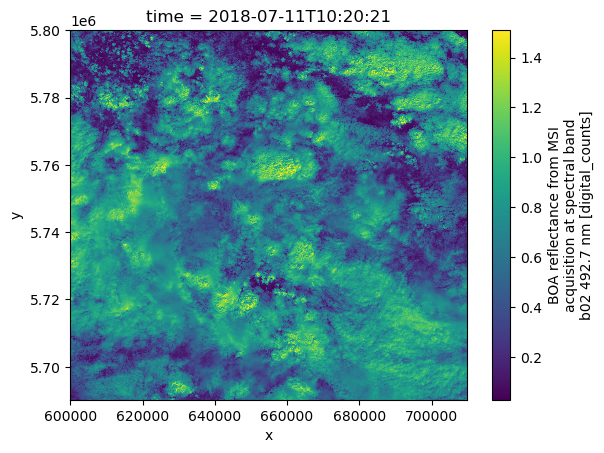

/srv/conda/envs/eopf-xarray/lib/python3.11/site-packages/dask/_task_spec.py:755: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)


In [13]:
ds_10m.sel(time=datetime(2018, 7, 11, 10, 20), method="nearest")["b02"].plot()

## Compute NDVI

In [14]:
def validate_scl(scl):
    invalid = [0, 1, 3, 7, 8, 9, 10]  # NO_DATA, SATURATED, CLOUD, etc.
    return ~scl.isin(invalid)



valid_mask = validate_scl(ds_10m["scl"])  # Boolean mask (10980x10980)

# Apply mask per pixel, keep spatial dims
valid_r10m = ds_10m.where(valid_mask)
b04 = valid_r10m["b04"]
b08 = valid_r10m["b08"]
ndvi = (b08 - b04) / (b08 + b04)  # Per-pixel NDVI

ds_10m["ndvi"] = (b08 - b04) / (b08 + b04)  # Per-pixel NDVI
ds_10m["b04_scl"] = b04
ds_10m["b03_scl"] = valid_r10m["b03"]
ds_10m["b02_scl"] = valid_r10m["b02"]

In [15]:
ds_10m

<xarray.Dataset> Size: 130GB
Dimensions:  (time: 15, y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
  * time     (time) datetime64[ns] 120B 2018-06-01T10:20:21 ... 2018-08-10T10...
Data variables:
    b02      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b03      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b04      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b08      (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    scl      (time, y, x) float64 14GB dask.array<chunksize=(1, 10980, 305), meta=np.ndarray>
    ndvi     (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>
    b04_scl  (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>
    b03_scl  (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>
    b02_scl  (time, y, x) float64 14GB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>

## Visualize NDVI for one single date

In [16]:
# Select one time
time_value = "20180601T102021"
# Subset spatially (optional, to reduce memory usage)
x_slice = slice(600005, 610005)  # ~1000 pixels
y_slice = slice(5800015, 5790225)  # ~1000 pixels

Text(0.5, 1.0, 'NDVI - 20180601T102021')

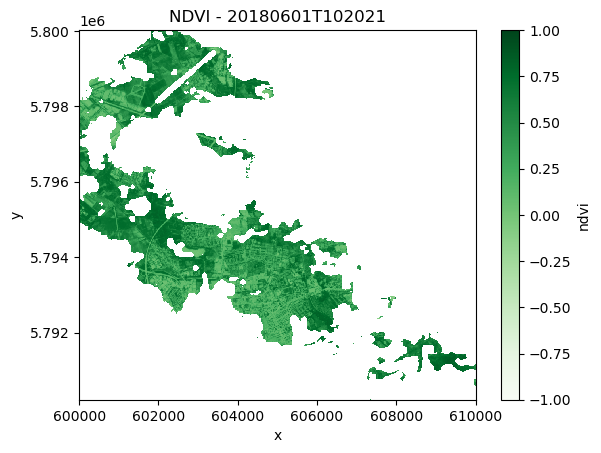

In [17]:
# NDVI plot
ds_10m.sel(time=time_value, 
                      x=x_slice, 
                      y=y_slice).ndvi.plot(cmap="Greens", vmin=-1, vmax=1)
plt.title(f"NDVI - {time_value}")

## Create RGB image

In [29]:
rgb_ds = ds_10m.sel(time=time_value, 
                      x=x_slice, 
                      y=y_slice)[["b04", "b03", "b02"]]

# Load data into memory (since Dask is lazy)
rgb_ds = rgb_ds.compute()  # Remove this if you want to keep it lazy and plot directly

In [30]:
# Stack bands into (y, x, 3) array for RGB
rgb_array = xr.concat(
    [rgb_ds["b04"], rgb_ds["b03"], rgb_ds["b02"]], 
    dim="rgb"
).transpose("y", "x", "rgb").values

In [31]:
# Clip and stretch for contrast
vmin, vmax = np.percentile(rgb_array, [2, 98])  # 2nd and 98th percentiles
rgb_array = np.clip(rgb_array, vmin, vmax)
rgb_array = (rgb_array - vmin) / (vmax - vmin)  # Scale to 0-1

## Visualize RGB image

Text(0.5, 1.0, 'RGB (Enhanced) - 20180601T102021')

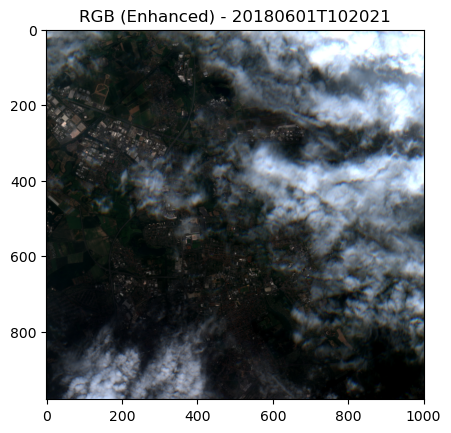

In [32]:
# RGB plot
plt.figure()
plt.imshow( rgb_array)
plt.title(f"RGB (Enhanced) - {time_value}")

## Aggregate NDVI over all the tiles for one year
- Group by year and compute mean

In [27]:
yearly_da = ds_10m.groupby("time.year").mean(dim="time", skipna=True)
yearly_da

<xarray.Dataset> Size: 9GB
Dimensions:  (year: 1, y: 10980, x: 10980)
Coordinates:
  * x        (x) int64 88kB 600005 600015 600025 600035 ... 709775 709785 709795
  * y        (y) int64 88kB 5800015 5800005 5799995 ... 5690245 5690235 5690225
  * year     (year) int64 8B 2018
Data variables:
    b02      (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b03      (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b04      (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    b08      (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 1830), meta=np.ndarray>
    scl      (year, y, x) float64 964MB dask.array<chunksize=(1, 10980, 305), meta=np.ndarray>
    ndvi     (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>
    b04_scl  (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>
    b03_scl  (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>
    b02_scl  (year, y, x) float64 964MB dask.array<chunksize=(1, 1830, 305), meta=np.ndarray>

## Visualize NDVI for 2018 and associated RGB image

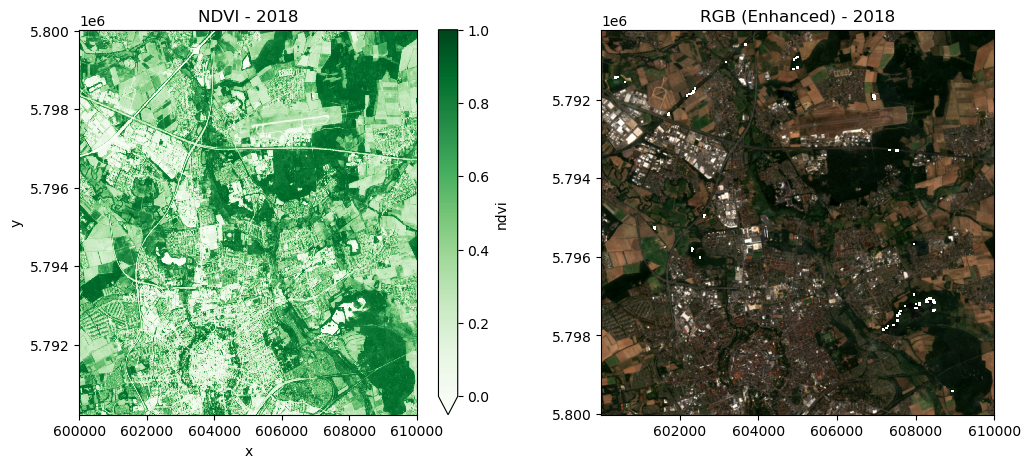

In [28]:
# Select year (descending y)
year = 2018  # Adjust if more years
region = yearly_da.sel(year=year, 
                      x=x_slice, 
                      y=y_slice)

# NDVI plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
region["ndvi"].plot(cmap="Greens", vmin=0, vmax=1)
plt.title(f"NDVI - {year}")

# Stack bands into (y, x, 3) array for RGB
rgb = xr.concat(
    [region["b04_scl"], region["b03_scl"], region["b02_scl"]], 
    dim="rgb"
).transpose("y", "x", "rgb").values
rgb = (rgb - 0.02) / (0.35 - 0.02)  # Stretch
rgb = rgb.clip(0, 1)
plt.subplot(1, 2, 2)
plt.imshow(rgb, extent=[x_slice.start, x_slice.stop, y_slice.start, y_slice.stop])
plt.title(f"RGB (Enhanced) - {year}")
plt.gca().set_aspect("equal")
plt.show()